In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('train.csv')

In [12]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
#Getting the independent features, i.e. title, author, text
X=df.drop('label',axis=1)

In [14]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [15]:
#Getting the Dependent features
Y=df['label']

In [16]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
#Total number of records
df.shape

(20800, 5)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#Dropping the null values from the dataframe
df=df.dropna()
df.shape

(18285, 5)

In [20]:
#Making a copy of the df and storing it in messages
messages=df.copy()

In [21]:
messages.reset_index(inplace=True)
messages.shape

(18285, 6)

In [22]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [23]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [27]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [28]:
X.shape

(18285, 5000)

In [29]:
y=messages['label']

In [30]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [31]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [32]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [33]:
import matplotlib.pyplot as plt

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultiNomial Naive Bayes Algorithm

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [36]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


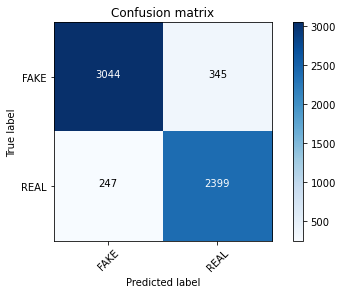

In [37]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [38]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

# Passive Aggressive Classifier Algorithm

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.920
Confusion matrix, without normalization


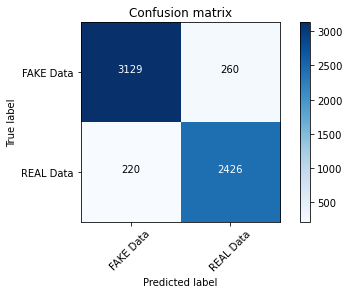

In [40]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Long Short Term Memory Model (LSTM)

In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'1.14.0'

In [43]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [44]:
### Vocabulary size
voc_size=5000

In [46]:
#ONE HOT REPRESENTATION
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3901, 1459, 2521, 3601, 3190, 3029, 2742, 2872, 3658, 4960],
 [1897, 1049, 4543, 1591, 1815, 2342, 326],
 [2539, 995, 2000, 964],
 [2586, 1213, 2010, 4291, 3791, 3512],
 [566, 1815, 3899, 4000, 1277, 2632, 1815, 3441, 4259, 4000],
 [1954,
  1870,
  4649,
  974,
  4606,
  3964,
  2971,
  2024,
  3551,
  3098,
  713,
  3278,
  1378,
  4011,
  326],
 [164, 1441, 3284, 4236, 520, 3541, 3397, 1182, 2052, 1302, 1395],
 [2432, 3067, 753, 2218, 302, 1620, 3964, 4153, 2052, 1302, 1395],
 [4732, 4561, 845, 1542, 3946, 1750, 655, 3024, 3964, 2423],
 [691, 13, 1667, 1706, 4350, 726, 1173, 4326],
 [637, 3581, 4668, 1190, 4584, 2461, 568, 1480, 3099, 4468, 2722],
 [4291, 2108, 3190, 1750, 3964, 302],
 [150, 4704, 4827, 3058, 2483, 1344, 1831, 1116, 3928],
 [625, 4397, 273, 390, 4372, 2456, 91, 2052, 1302, 1395],
 [296, 419, 4372, 2771, 4327, 2052, 1302, 1395],
 [3983, 2133, 224, 3660, 4864, 1150, 4389, 1734, 3281, 2205],
 [3648, 289, 1049],
 [3397, 294, 2220, 4342, 3964, 1424, 2003, 326],
 [2886, 

In [47]:
#Embedding Representation
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2872 3658 4960]
 [   0    0    0 ... 1815 2342  326]
 [   0    0    0 ...  995 2000  964]
 ...
 [   0    0    0 ... 2052 1302 1395]
 [   0    0    0 ... 3077 2842 4828]
 [   0    0    0 ...  579 2723 4918]]


In [48]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3901,
       1459, 2521, 3601, 3190, 3029, 2742, 2872, 3658, 4960])

In [50]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
len(embedded_docs),y.shape

(18285, (18285,))

In [52]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [53]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [55]:
### MODEL TRAINING
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 12250 samples, validate on 6035 samples
Epoch 1/10
12250/12250 [==============================] - 10s 831us/sample - loss: 0.3403 - acc: 0.8366 - val_loss: 0.1937 - val_acc: 0.9186
Epoch 2/10
12250/12250 [==============================] - 10s 822us/sample - loss: 0.1387 - acc: 0.9457 - val_loss: 0.2007 - val_acc: 0.9226
Epoch 3/10
12250/12250 [==============================] - 8s 681us/sample - loss: 0.0994 - acc: 0.9650 - val_loss: 0.2234 - val_acc: 0.9195
Epoch 4/10
12250/12250 [==============================] - 9s 731us/sample - loss: 0.0735 - acc: 0.9732 - val_loss: 0.2562 - val_acc: 0.9165
Epoch 5/10
12250/12250 [==============================] - 9s 714us/sample - loss: 0.0519 - acc: 0.9837 - val_loss: 0.2953 - val_acc: 0.9147
Epoch 6/10
12250/12250 [==============================] - 9s 729us/sample - loss: 0.0369 - acc: 0.9883 - val_loss: 0.3787 - val_acc: 0.9117
Epoch 7/10
12250/12250 [==============================] - 9s 707us/sample - loss: 0.0290 - acc: 0.9913 - val_

In [56]:
#ADDING DROPOUT
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
y_pred=model.predict_classes(X_test)

Confusion matrix, without normalization


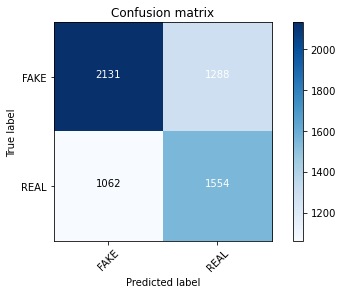

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6106048053024027